In [1]:
# !pip3 install torch


In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch
print(torch.__version__)

1.0.1.post2


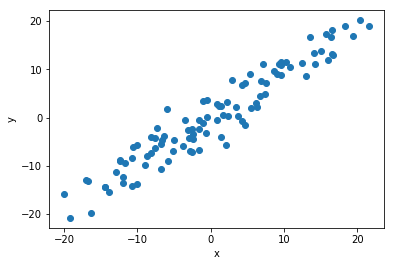

In [4]:
# 100 rows and 1 column, each point has a 
# single point with a normal distribution
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [5]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__() 
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [6]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [7]:
[w, b] = model.parameters()
# print(w, b)
def get_params():
  return (w[0][0].item(), b[0].item())

In [8]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

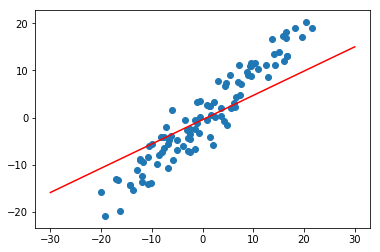

In [9]:
plot_fit('Initial Model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [10]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward() #computes the derivative of the loss function
  optimizer.step() #magically uses the loss dirivative to updat the model weight

epoch: 0 loss: 34.606773376464844
epoch: 1 loss: 32.641448974609375
epoch: 2 loss: 30.837696075439453
epoch: 3 loss: 29.182172775268555
epoch: 4 loss: 27.662689208984375
epoch: 5 loss: 26.2680606842041
epoch: 6 loss: 24.987957000732422
epoch: 7 loss: 23.813003540039062
epoch: 8 loss: 22.734525680541992
epoch: 9 loss: 21.744590759277344
epoch: 10 loss: 20.835914611816406
epoch: 11 loss: 20.001802444458008
epoch: 12 loss: 19.236114501953125
epoch: 13 loss: 18.533241271972656
epoch: 14 loss: 17.88799285888672
epoch: 15 loss: 17.295654296875
epoch: 16 loss: 16.751863479614258
epoch: 17 loss: 16.252628326416016
epoch: 18 loss: 15.794288635253906
epoch: 19 loss: 15.373481750488281
epoch: 20 loss: 14.987119674682617
epoch: 21 loss: 14.632369995117188
epoch: 22 loss: 14.306648254394531
epoch: 23 loss: 14.007560729980469
epoch: 24 loss: 13.73292064666748
epoch: 25 loss: 13.480721473693848
epoch: 26 loss: 13.249117851257324
epoch: 27 loss: 13.036426544189453
epoch: 28 loss: 12.841087341308594
ep

Text(0.5, 0, 'epoch')

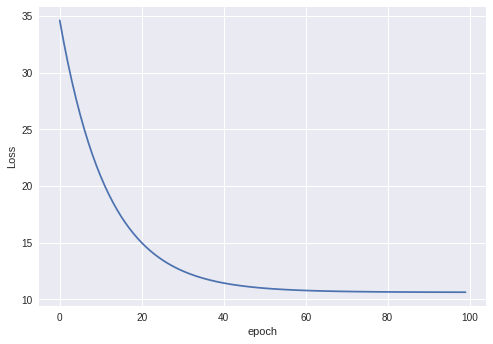

In [11]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [12]:
plot_fit("Trained Model")

NameError: name 'plot_fit' is not defined